# Load some example data and display it

In [1]:
import shapely.wkt
import pyvista
import numpy as np
import vtk

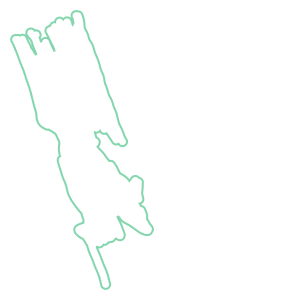

In [2]:
with open("shape.wkt") as f:
    shape = shapely.wkt.load(f)
shape

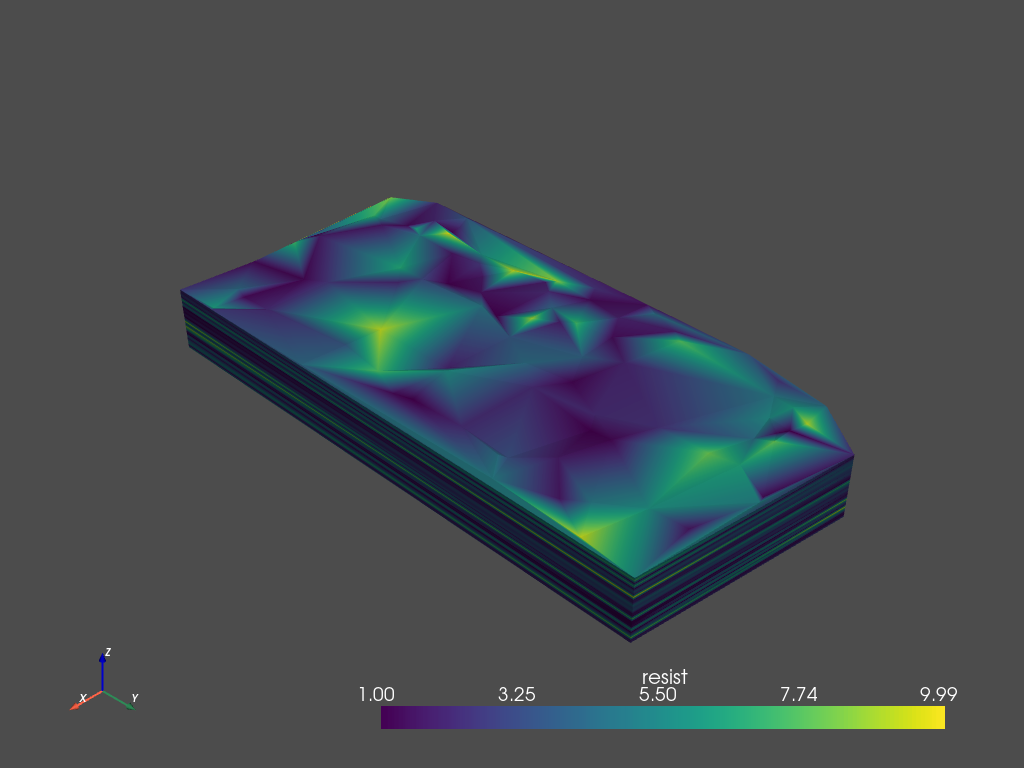

[(6848.092629987981, 7987.051209562434, 5463.375525881834),
 (1159.763204296695, 2298.7217838711485, -224.95389980945183),
 (0.0, 0.0, 1.0)]

In [3]:
mesh = pyvista.read("volume.vtk")
mesh.plot(scalars="resist")

# Slice along a simple line

Here, I use pyvista.Line as documented here https://docs.pyvista.org/examples/01-filter/slicing.html#slice-along-line

Note how the slice neither lines up perfectly with the line, nor stops at the end of the
line but extends to the end of the volume, taking random turns and twists.

In [4]:
line = pyvista.Line([500, 500, 0], [1500, 500, 0], 10)

In [5]:
slice = mesh.slice_along_line(line, generate_triangles=True)

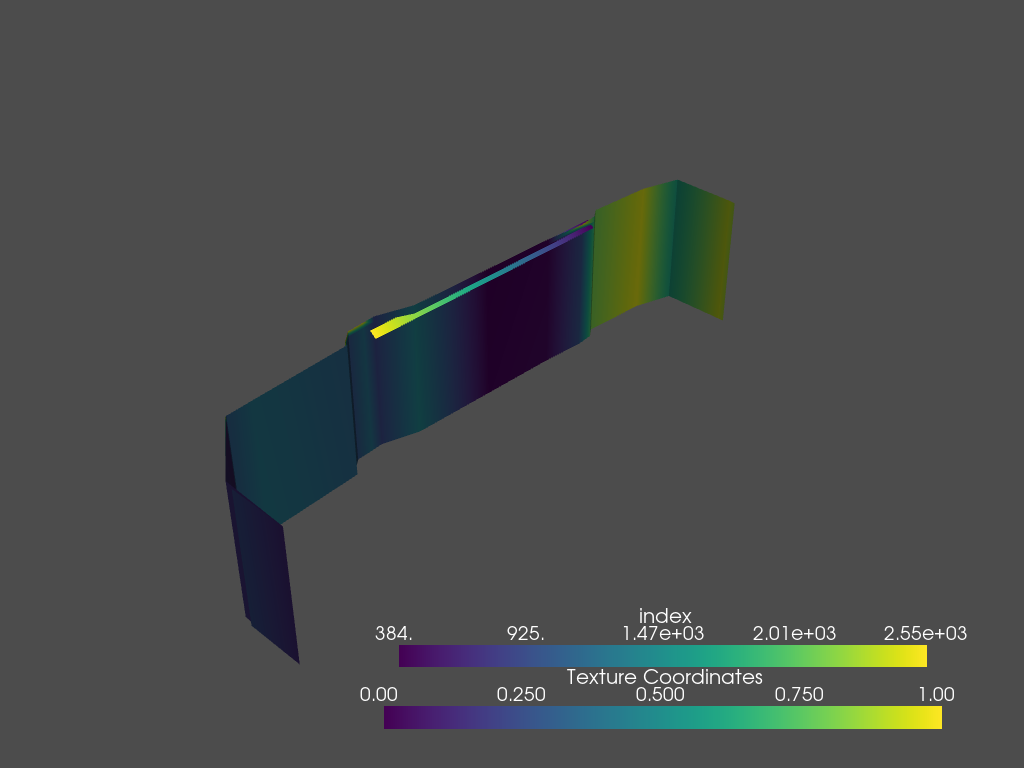

[(3824.3688828328495, 3434.672589669317, 2442.5182055843034),
 (1157.1201931422004, 767.4238999786674, -224.73048410634595),
 (0.0, 0.0, 1.0)]

In [6]:
p = pyvista.Plotter()
p.add_mesh(line, line_width=10)
p.add_mesh(slice)
p.show()

# Slice along an actual PolyLine

`pyvista.Line()` produces a `pyvista.PolyData` object with resolution number of line segments. So I tried making the same structure, but with line segments in the shape of `shape` above instead of all on a straight line.

This is even more disastruous - the slice barely matches up with the line greatly simplifying the shape.


In [7]:
points = vtk.vtkPoints()
for coord in shape.coords:
    points.InsertNextPoint(coord + (0,))
polyLine = vtk.vtkPolyLine()
polyLine.GetPointIds().SetNumberOfIds(len(shape.coords))
for i in range(0, len(shape.coords)):
    polyLine.GetPointIds().SetId(i, i)
cells = vtk.vtkCellArray()
cells.InsertNextCell(polyLine)
polyData = vtk.vtkPolyData()
polyData.SetPoints(points)
polyData.SetLines(cells)
polyData = pyvista.wrap(polyData)

In [8]:
slice = mesh.slice_along_line(polyData, generate_triangles=True)

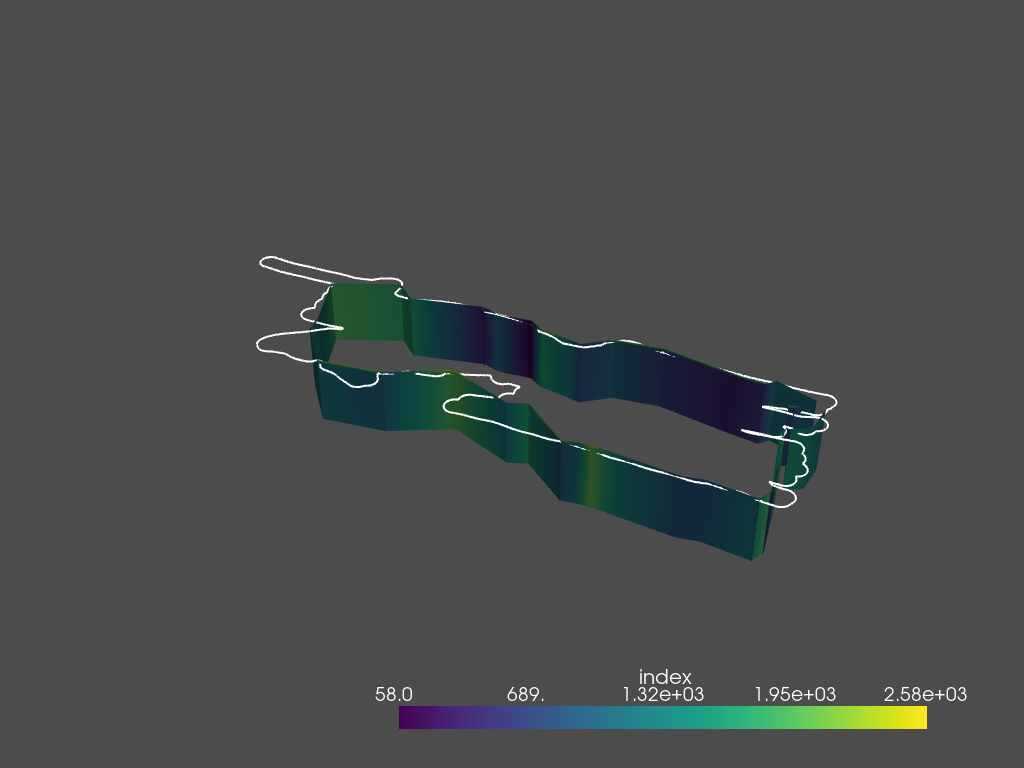

[(6932.496997310881, 8052.5033449682805, 5538.938649703194),
 (1168.529296874549, 2288.5356445319485, -225.0290507331386),
 (0.0, 0.0, 1.0)]

In [9]:
p = pyvista.Plotter()
p.add_mesh(polyData, line_width=2)
p.add_mesh(slice)
p.show()

# Slice along a complex spline

Here, I use pyvista.Spine as documented here https://docs.pyvista.org/examples/01-filter/slicing.html#slice-along-line

Note that the shape of the spline matches pretty well with the linestring shape above with the resolution given to `pyvista.Spline` here, however the slice generated still won't match up with the spline but simplifies the shape, just like with the polyline above.

In [10]:
spline = pyvista.Spline(np.column_stack((shape.coords, np.zeros(len(shape.coords)))), 10000)

In [11]:
slice = mesh.slice_along_line(spline, generate_triangles=True)

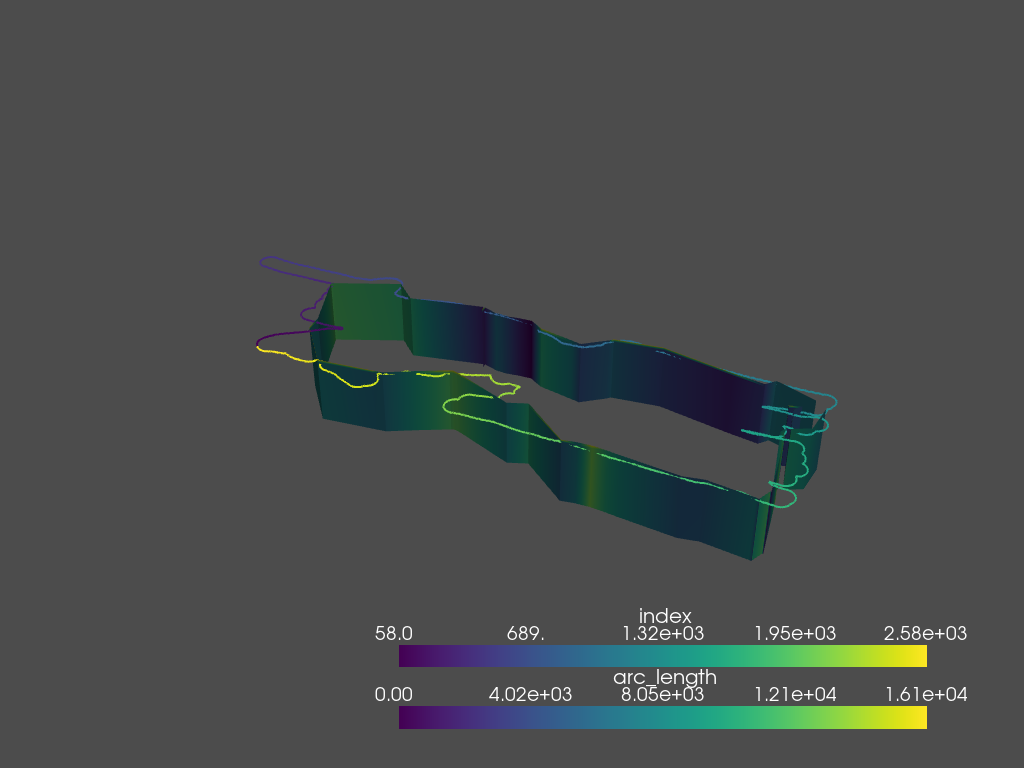

[(6932.637275707199, 8052.708977766597, 5539.07162991231),
 (1168.5315768191358, 2288.6032788785337, -225.03406897575348),
 (0.0, 0.0, 1.0)]

In [12]:
p = pyvista.Plotter()
p.add_mesh(spline, line_width=2)
p.add_mesh(slice)
p.show()

# My environment

In [13]:
print(pyvista.Report())


--------------------------------------------------------------------------------
  Date: Mon May 10 15:22:07 2021 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
       Environment : Jupyter
        GPU Vendor : Intel Open Source Technology Center
      GPU Renderer : Mesa DRI Intel(R) Haswell Mobile
       GPU Version : 4.5 (Core Profile) Mesa 19.2.8

  Python 3.8.0 (default, Feb 25 2021, 22:10:10)  [GCC 8.4.0]

           pyvista : 0.29.1
               vtk : 9.0.1
             numpy : 1.20.2
           imageio : 2.9.0
           appdirs : 1.4.4
            scooby : 0.5.7
            meshio : 4.4.0
        matplotlib : 3.4.1
           IPython : 7.22.0
             scipy : 1.6.3
              tqdm : 4.60.0
--------------------------------------------------------------------------------
